In [ ]:
pip install Faker

     |████████████████████████████████| 1.5 MB 5.3 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # ggplot - a data visualisation package
from faker import Faker # Faker - library which generates fake data for us

fake = Faker()
# To make the results are reproducible

Faker.seed(4321)
name_list = []
fake = Faker()

for _ in range(100):
  name_list.append(fake.name())
  # len(name_list) 
# print(name_list)
np.random.seed(7)

salary_list = []

for _ in range(100):
  sal = np.random.randint(1000,3000)
  salary_list.append(sal)
  # len(salary) 

# CREATE A DATAFRAME 
salary_df = pd.DataFrame(
    {'person':name_list,
     'salary':salary_list})

# DISPLAY THE DATAFRAME
print(salary_df.head())

              person  salary
0        Jason Brown    1175
1        Jacob Stein    2220
2         Cody Brown    1537
3      Larry Morales    1502
4  Jessica Hendricks    2603


AxesSubplot(0.125,0.125;0.775x0.755)


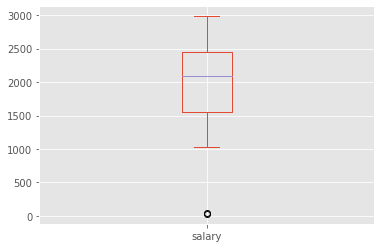

In [ ]:
# Next is creating the outlier of our own
# Purposefully generating two anomalies
salary_df.at[16,'salary'] = 30
salary_df.at[70,'salary'] = 50
print(salary_df['salary'].plot(kind='box'))

# the black circle represents the anomaly

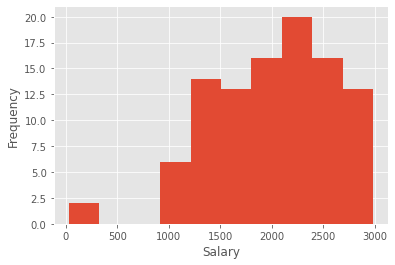

In [ ]:
# THE OUTLIER IS ALSO PROVEN USING THE HISTOGRAM

ax = salary_df['salary'].plot(kind='hist')
ax.set_xlabel('Salary')
ax

In [ ]:
print('min salary '+str(salary_df['salary'].min()))
print('max salary '+str(salary_df['salary'].max()))

min salary 30
max salary 2984


In [ ]:
# CREATING A RAW SALARY DATA

salary_raw = salary_df['salary'].values
# print(salary_raw)
salary_raw = salary_raw.reshape(-1,1)
# print(salary_raw)
salary_raw = salary_raw.astype('float64')


In [ ]:
# TO DO OUTLIER REDUCTION, K-MEANS IS CALLED

from scipy.cluster.vq import vq, kmeans # vq - vection quantisation

codebook, distortion = kmeans(salary_raw,4)
print('codebook=',codebook,',distortion=',distortion)

codebook= [[2723.625     ]
 [1204.95652174]
 [1792.17391304]
 [2230.06666667]] ,distortion= 145.0509065934066


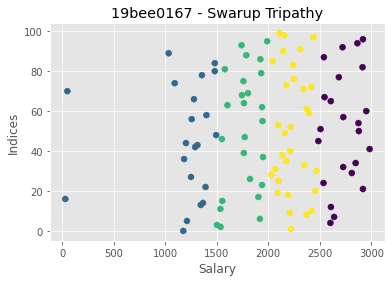

In [ ]:
groups,cdist = vq(salary_raw,codebook)
plt.scatter(salary_raw, np.arange(100), c=groups) #Return evenly spaced values within a given interval
plt.xlabel('Salary')
plt.ylabel('Indices')
plt.title('19bee0167 - Swarup Tripathy')
plt.show()

The outliers are the two dots present in the leftmost part present on indices 70 and 16

Further to calculate first quartile, second quartile and third quartile